# Gene term enrichment analysis

In [1]:
suppressMessages({
    library(clusterProfiler)
    library(org.Hs.eg.db)
    library(enrichplot)
    library(pathview)})

In [2]:
enrichment_analysisGO <- function(gene, universe, ont, w=9, h=8){
    ego <- enrichGO(gene          = gene,
                    universe      = names(universe),
                    OrgDb         = org.Hs.eg.db,
                    ont           = ont,
                    keyType       = 'ENSEMBL',
                    pAdjustMethod = "BH",
                    pvalueCutoff  = 0.05,
                    qvalueCutoff  = 0.10,
                    readable      = TRUE)
    write.table(as.data.frame(ego), file=paste0("enrichGO_CTLvsSZ_", ont, ".txt"),
                sep='\t', quote=FALSE, row.names=FALSE)
    print(dotplot(ego))
    pdf(file=paste0("enrichGO_CTLvsSZ_", ont, ".pdf"), width=w, height=h)
    print(dotplot(ego))
    dev.off()
    
    print(goplot(ego))
    pdf(file=paste0("goplot_CTLvsSZ_", ont, ".pdf"), width=9, height=9)
    print(goplot(ego))
    dev.off()

    print(upsetplot(ego))
    pdf(file=paste0("upsetplot_enrichGO_CTLvsSZ_", ont, ".pdf"), width=9, height=7)
    print(upsetplot(ego))
    dev.off()
}


In [3]:
compareUp_Down <- function(df, ont){
    formula_res <- compareCluster(ensemblID~group, data=df,
                                  pvalueCutoff=0.05, OrgDb=org.Hs.eg.db,
                                  keyType='ENSEMBL', ont=ont, fun="enrichGO")
    write.table(as.data.frame(formula_res),
                file=paste0("compareCluster_enrichGO_CTLvsSZ_", ont, ".txt"),
                sep='\t', quote=FALSE, row.names=FALSE)
    pdf(file=paste0("compareCluster_enrichGO_CTLvsSZ_", ont, ".pdf"), width=9, height=8)
    print(dotplot(formula_res))
    dev.off()
}

## Genes

In [4]:
extract_geneList <- function(de_file, inputfile, keytype='ensemblID'){
    dft = merge(read.delim(de_file, stringsAsFactor=FALSE),
                read.delim(inputfile, stringsAsFactor=FALSE), 
                by.x='ensemblID', by.y='FILE')
    gg = as.vector(dft[, 'TWAS.Z'])
    names(gg) = as.vector(dft[, keytype])
    gg = sort(gg, decreasing=TRUE)
    return(gg)
}


extract_geneSet <- function(de_file, inputfile, keytype='ensemblID'){
    dft = merge(read.delim(de_file, stringsAsFactor=FALSE),
                read.delim(inputfile, stringsAsFactor=FALSE), 
                by.x='ensemblID', by.y='FILE')
    gg = subset(dft, FDR <= 0.05)
    gene = as.vector(gg[, keytype])
    return(gene)
}


subset_direction <- function(de_file, inputfile){
    dft = merge(read.delim(de_file, stringsAsFactor=FALSE),
                read.delim(inputfile, stringsAsFactor=FALSE), 
                by.x='ensemblID', by.y='FILE')
    dt = subset(dft, FDR <= 0.05, select=c('ensemblID', 'TWAS.Z', 'FDR'))
    dt$group = "upregulated"
    dt$group[dt['TWAS.Z'] < 0] = "downregulated"
    return(dt)
}

In [5]:
feature = 'genes'
de_file = paste0("../../../../../../differential_expression/_m/", feature, "/diffExpr_szVctl_full.txt")
inputfile = paste0("../../_m/fusion_associations.txt")

geneList1 = extract_geneList(de_file, inputfile)
gene1 = extract_geneSet(de_file, inputfile)

### Run GO enrichment analysis

wrong orderBy parameter; set to default `orderBy = "x"`

wrong orderBy parameter; set to default `orderBy = "x"`



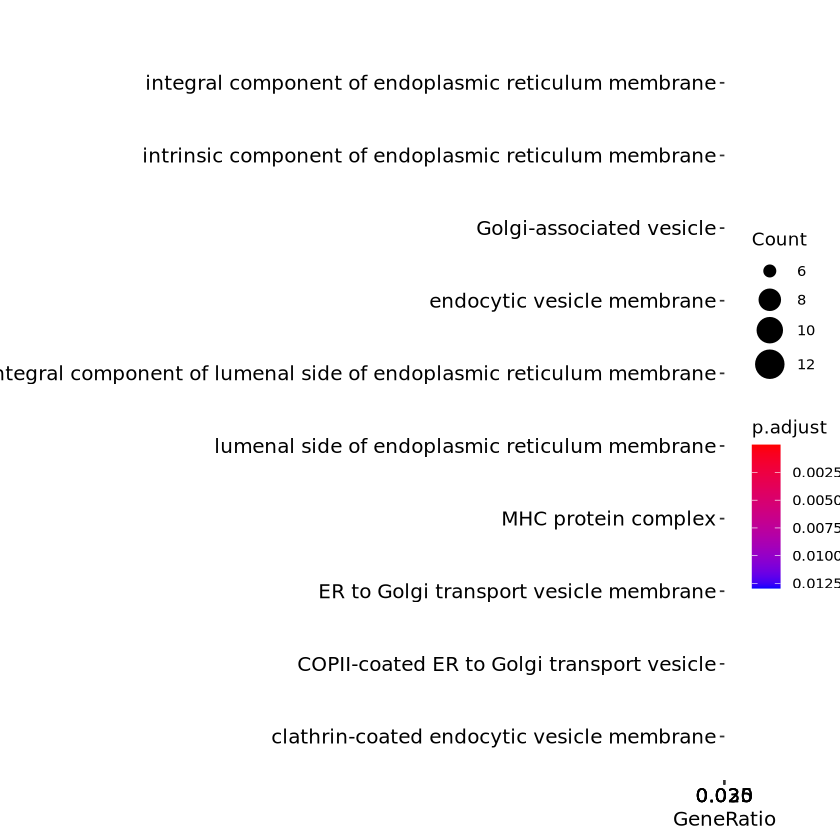

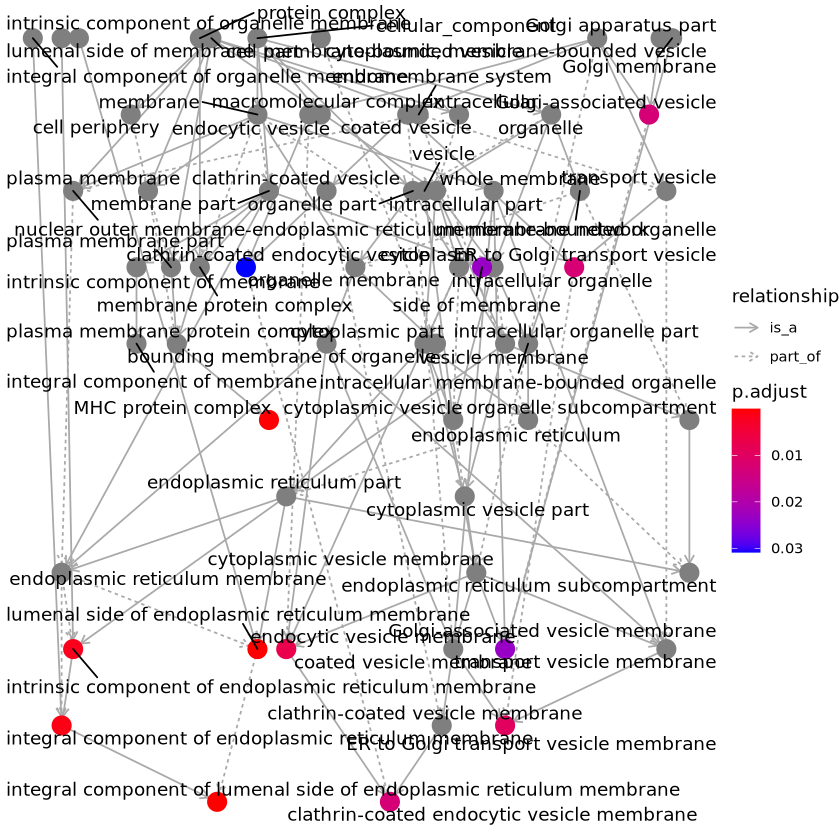

png 
  2

wrong orderBy parameter; set to default `orderBy = "x"`

wrong orderBy parameter; set to default `orderBy = "x"`



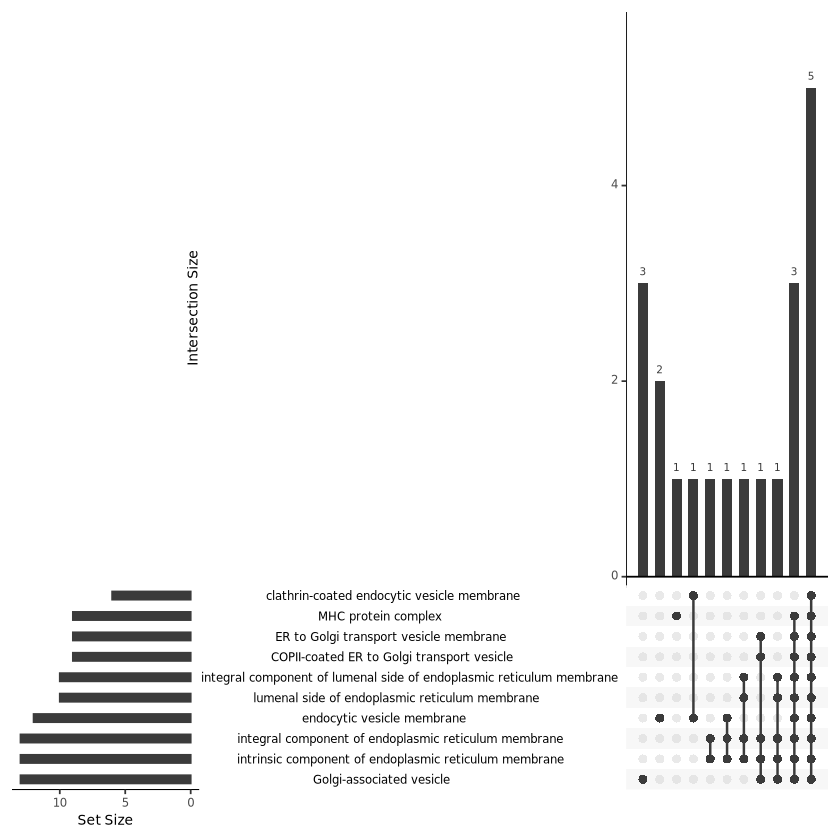

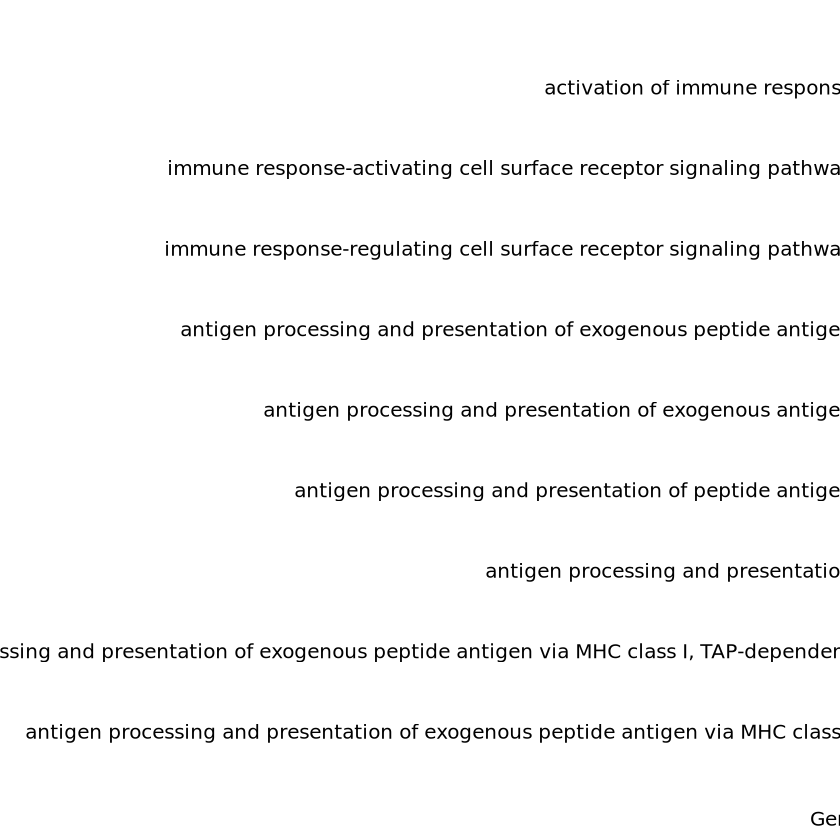

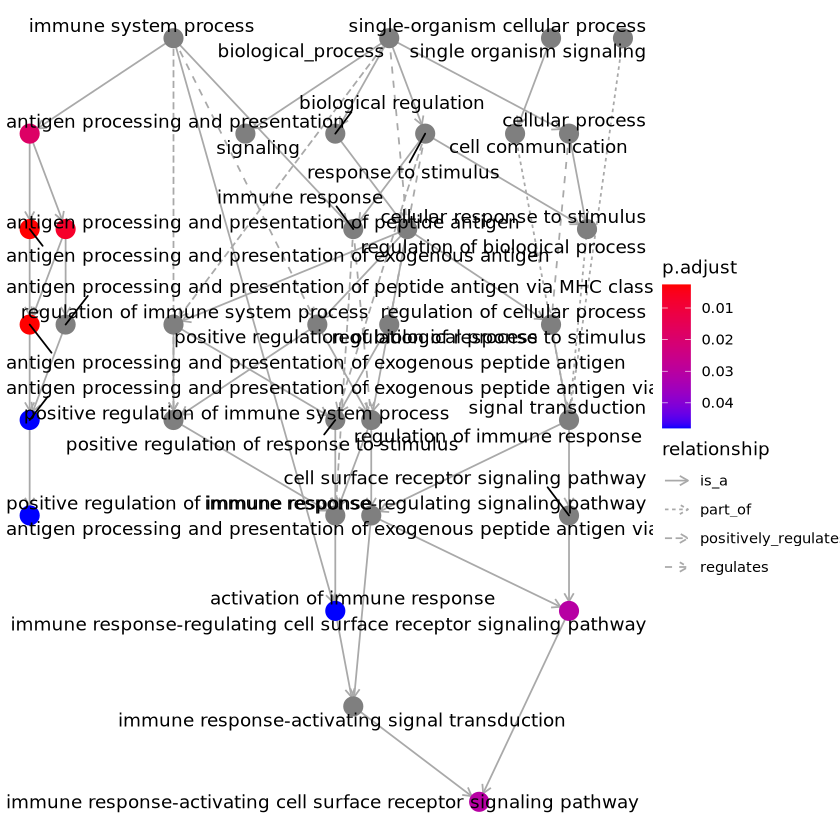

png 
  2

wrong orderBy parameter; set to default `orderBy = "x"`

wrong orderBy parameter; set to default `orderBy = "x"`



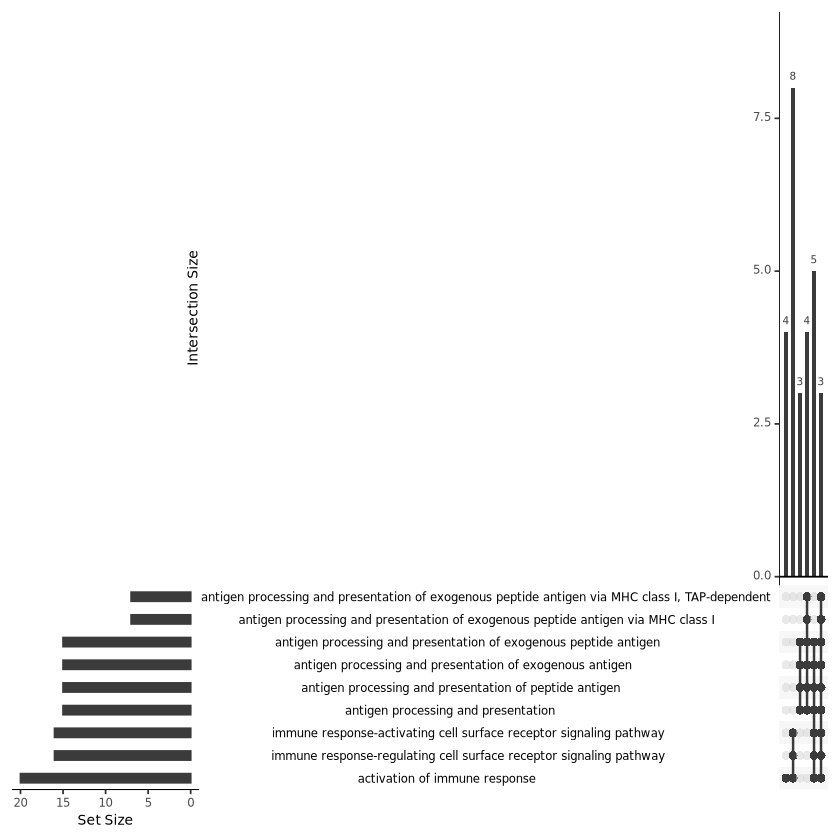

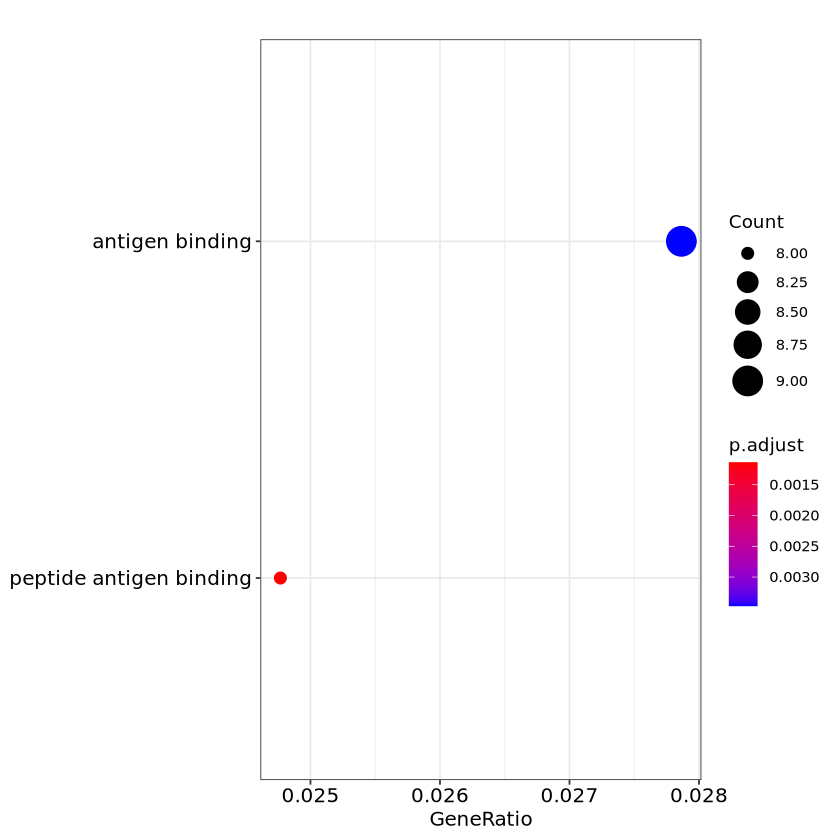

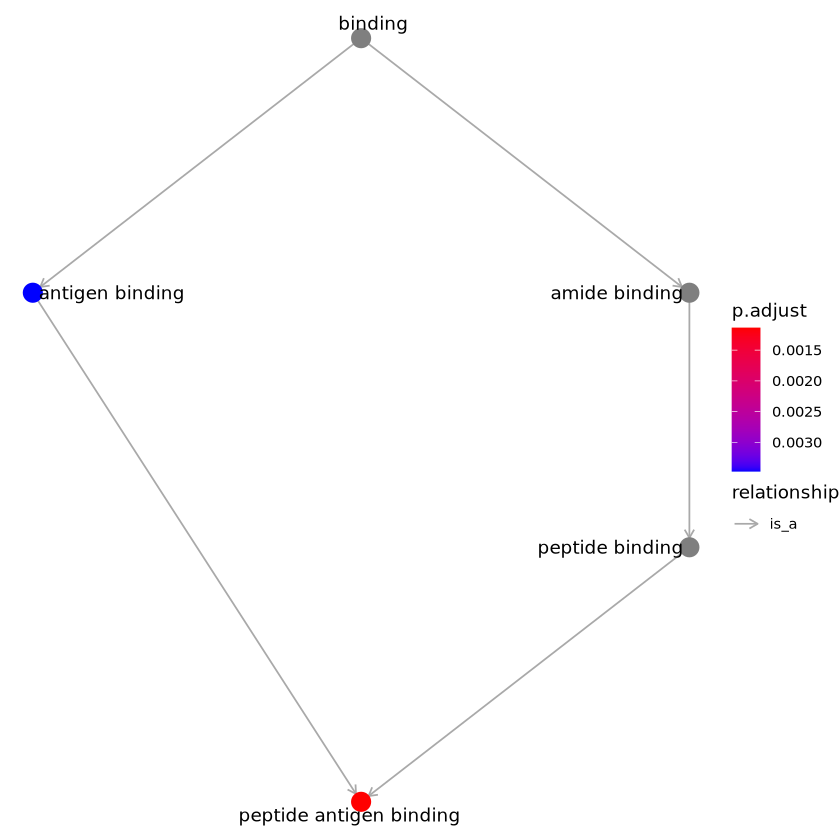

png 
  2

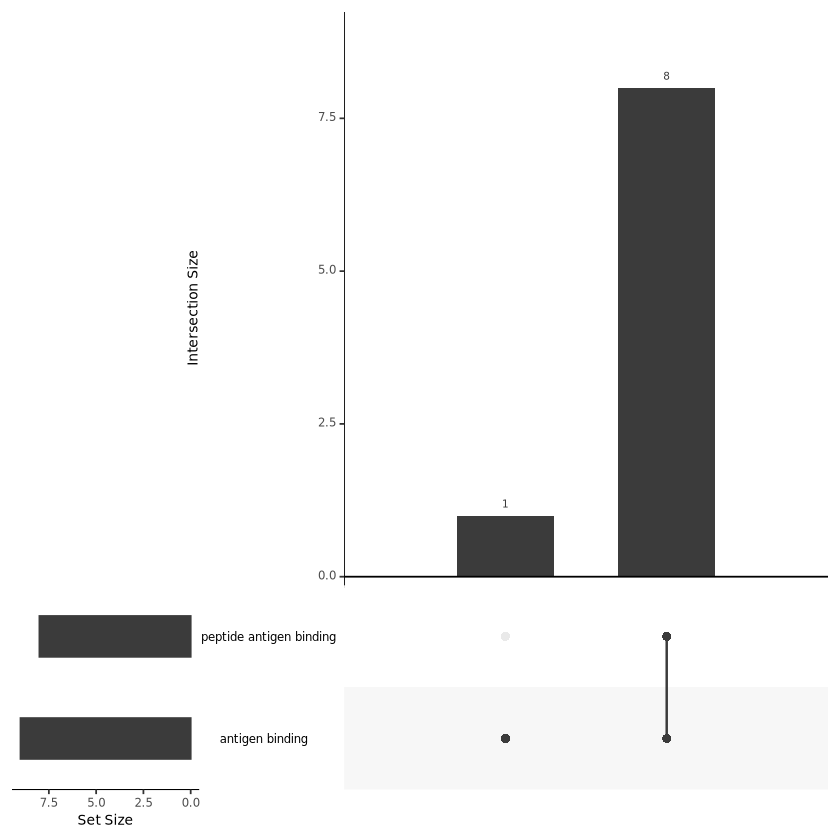

In [6]:
enrichment_analysisGO(gene1, geneList1, "CC", 10)
enrichment_analysisGO(gene1, geneList1, "BP", 12)
enrichment_analysisGO(gene1, geneList1, "MF", 6)

### Directionality

In [7]:
mydf = subset_direction(de_file, inputfile)
head(mydf)

,ensemblID,TWAS.Z,FDR,group
,<chr>,<dbl>,<dbl>,<chr>
20,ENSG00000004534,3.312402,1.583621e-02,upregulated
23,ENSG00000005100,-2.863291,4.589966e-02,downregulated
26,ENSG00000005238,2.901779,4.203099e-02,upregulated
36,ENSG00000006715,-3.401917,1.217501e-02,downregulated
38,ENSG00000006744,4.529586,2.616727e-04,upregulated
44,ENSG00000007923,-5.084607,2.277941e-05,downregulated


In [8]:
compareUp_Down(mydf, "CC")

png 
  2

In [9]:
#compareUp_Down(mydf, "BP") # No enrichment

ERROR: Error in compareCluster(ensemblID ~ group, data = df, pvalueCutoff = 0.05, : No enrichment found in any of gene cluster, please check your input...


In [10]:
#compareUp_Down(mydf, "MF") # No enrichment

ERROR: Error in compareCluster(ensemblID ~ group, data = df, pvalueCutoff = 0.05, : No enrichment found in any of gene cluster, please check your input...


## Session Info

In [ ]:
Sys.time()
proc.time()
options(width=120)
sessioninfo::session_info()